# Part I - Ford GoBike System Data
## by Opeyemi Ogundaisi

## Introduction
> This data collection contains details on each trip taken in a bike-sharing program that serves the greater San Francisco Bay region.

## The following rubic cube tips were followed

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [4]:
#importing packages/libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [5]:
#Loaing and previewing dataset
df = pd.read_csv("/home/opejoseph/Documents/ALX Assignments/201902-fordgobike-tripdata.csv")
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
32499,385,2019-02-24 14:18:46.3920,2019-02-24 14:25:12.1910,267.0,Derby St at College Ave,37.861804,-122.253569,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,4912,Subscriber,1995.0,Male,No
141597,1549,2019-02-07 17:33:32.5810,2019-02-07 17:59:22.4790,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,130.0,22nd St Caltrain Station,37.757288,-122.392051,4993,Subscriber,1990.0,Female,No
173795,835,2019-02-03 09:15:58.1770,2019-02-03 09:29:53.8490,109.0,17th St at Valencia St,37.763316,-122.421904,130.0,22nd St Caltrain Station,37.757288,-122.392051,4970,Subscriber,NaN,NaN,No
169229,387,2019-02-04 11:41:09.4300,2019-02-04 11:47:36.6970,280.0,San Fernando St at 7th St,37.337122,-121.883215,357.0,2nd St at Julian St,37.341132,-121.892844,4000,Subscriber,1991.0,Male,Yes
123762,277,2019-02-11 09:07:58.0550,2019-02-11 09:12:35.1570,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,4536,Subscriber,1998.0,Male,No


# Checking structure of the dataset

In [6]:
df.shape

(183412, 16)

In [7]:
#running describe() to check for the statistic info of the dataset records
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
#using info() to check for the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# Cleaning
### Checking for and removing nulls

In [9]:
#checking for columns containing null rows.
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
#Inspecting the "member_gender" column to be sure of the values therein
df["member_gender"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64>

### Form the inspection above it is assumed that the "others" there is pointing to binaries or gender other than male or female 
### So it is safe to drop the rows in station id, start_station_name, member_birth_year and member_gender.

In [11]:
#dropping the NAN in 'member_birth_year', 'member_gender','start_station_id' and'start_station_name' columns.
bike_drop_empty_row = df.dropna(subset=['member_birth_year', 'member_gender','start_station_id', 'start_station_name'])
#resetting index
bike_drop_empty_row = bike_drop_empty_row.reset_index()
#confirming rows are emptied
bike_drop_empty_row.isnull().sum()

index                      0
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
#checking the partially cleaned dataset
bike_drop_empty_row

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
174948,183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
174949,183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
174950,183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [13]:
bike_drop_empty_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    174952 non-null  int64  
 1   duration_sec             174952 non-null  int64  
 2   start_time               174952 non-null  object 
 3   end_time                 174952 non-null  object 
 4   start_station_id         174952 non-null  float64
 5   start_station_name       174952 non-null  object 
 6   start_station_latitude   174952 non-null  float64
 7   start_station_longitude  174952 non-null  float64
 8   end_station_id           174952 non-null  float64
 9   end_station_name         174952 non-null  object 
 10  end_station_latitude     174952 non-null  float64
 11  end_station_longitude    174952 non-null  float64
 12  bike_id                  174952 non-null  int64  
 13  user_type                174952 non-null  object 
 14  memb

# Questions 
### (Noting down questions to be asked in other to know which columns to preserve going forward)

> Univariate Exploration
### 1. What is the  unique amount of gender being analysed
### 2. Comparing consumer to subscriber amount.
### 3. Most popular start stations
### 4. Most popular end stations

> Bivariate Exploration
### 5. What is the top 5 longest duration of bike trips made by start station.
### 6. What is the top 5 longest duration of bike trips made by end station.
### 7. Check the distribution of user type  by gender.

> Multivariate Exploration
### 8. Comparing start staion name and duration by gender type.
### 9. Comparing end station name and duration by gender type.
### 10. Checking how long each gender commuted on the start day

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [15]:
bike_drop_empty_row["start_time_conv"] = pd.to_datetime(bike_drop_empty_row['start_time'])
bike_drop_empty_row["end_time_conv"] = pd.to_datetime(bike_drop_empty_row['end_time'])
bike_drop_empty_row

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_conv,end_time_conv
0,0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975
1,2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146
2,3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842
3,4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074
4,5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034
174948,183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502
174949,183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220
174950,183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287


### dropping unused columns, re-ordering columns arrangement

In [16]:
#dropping columns not neeed for analysis
bike_drop_empty_row.drop(['index',
                       'start_time',
                       'end_time',
                       'start_station_id',
                       'end_station_id'],
                      axis=1, inplace=True)


#re-ordering columns
bike_drop_empty_row = bike_drop_empty_row[[
 'start_time_conv',
 'end_time_conv', 
 'duration_sec',
 'start_station_name', 
 'start_station_latitude', 
 'start_station_longitude', 
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']]

In [17]:
""" dropping columns not neeed for analysis 
bike_drop_empty_row.drop(['index',
                       'start_time',
                       'end_time',
                       'start_station_id',
                       'end_station_id'],
                      axis=1, inplace=True) ***/


#re-ordering columns
bike_drop_empty_row = bike_drop_empty_row[[
 'start_time_conv',
 'end_time_conv', 
 'duration_sec',
 'start_station_name', 
 'start_station_latitude', 
 'start_station_longitude', 
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']] """ 

" dropping columns not neeed for analysis \nbike_drop_empty_row.drop(['index',\n                       'start_time',\n                       'end_time',\n                       'start_station_id',\n                       'end_station_id'],\n                      axis=1, inplace=True) ***/\n\n\n#re-ordering columns\nbike_drop_empty_row = bike_drop_empty_row[[\n 'start_time_conv',\n 'end_time_conv', \n 'duration_sec',\n 'start_station_name', \n 'start_station_latitude', \n 'start_station_longitude', \n 'end_station_name',\n 'end_station_latitude',\n 'end_station_longitude',\n 'bike_id',\n 'user_type',\n 'member_birth_year',\n 'member_gender',\n 'bike_share_for_all_trip']] "

### Create a copy of the cleaned data(bike_drop_empty_row)  as cleaned_df to be use for analysis and
### previewing final cleaned data

In [18]:
cleaned_df = bike_drop_empty_row
cleaned_df.sample(3)

,start_time_conv,end_time_conv,duration_sec,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
6463,2019-02-28 09:42:58.921,2019-02-28 09:53:36.071,637,Rhode Island St at 17th St,37.764478,-122.402570,4th St at Harrison St,37.780955,-122.399749,4826,Subscriber,1993.0,Male,No
4869,2019-02-28 14:05:05.066,2019-02-28 14:13:56.924,531,22nd St at Dolores St,37.755000,-122.425728,Market St at Dolores St,37.769305,-122.426826,6631,Subscriber,1983.0,Male,No
64447,2019-02-20 08:02:18.975,2019-02-20 08:05:30.478,191,49th St at Telegraph Ave,37.835946,-122.262366,MacArthur BART Station,37.828410,-122.266315,2455,Subscriber,1991.0,Male,No


# **Univariate Exploration
# 1. What is the  unique amount of gender being analysed
### Male      - 130, 500
### Female     - 40, 805
### Other       - 3, 647

In [19]:
cleaned_df["member_gender"].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

[Text(0.5, 1.0, 'Distribution of Gender')]

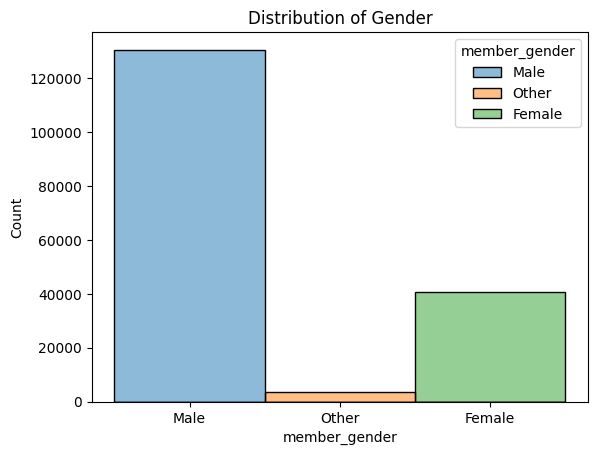

In [20]:
#plot for gender distribution
sns.histplot(data=cleaned_df, x="member_gender", hue="member_gender").set(title='Distribution of Gender')

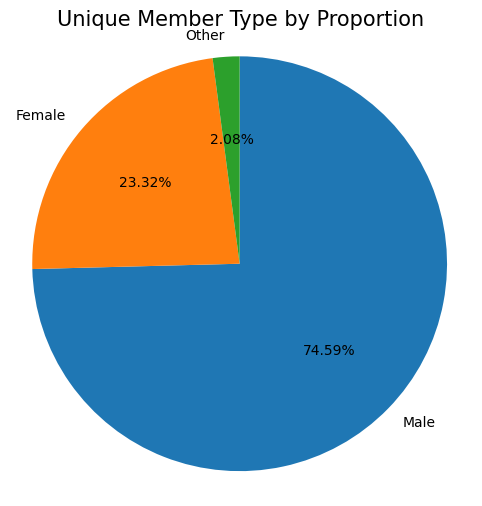

In [36]:
#Show user type by it's percentage

plt.figure(figsize=(10,6))
sorted_counts = cleaned_df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Unique Member Type by Proportion', fontsize=15);

# 2. Comparing consumer to subscriber amount.

[Text(0.5, 1.0, 'Distribution of UserTypes')]

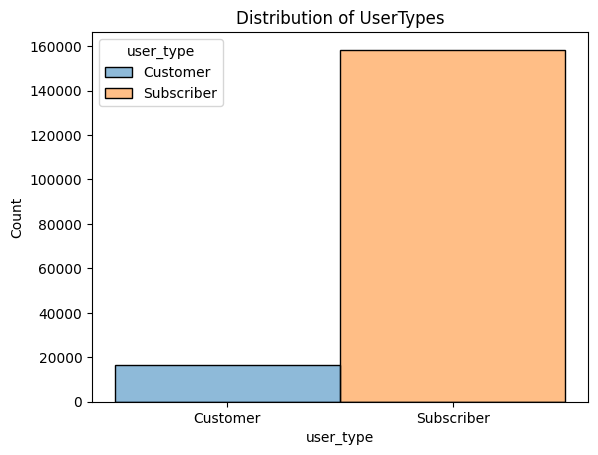

In [22]:
# There is ony two type of user

cleaned_df.user_type.unique()
sns.histplot(data=cleaned_df, x="user_type", hue="user_type").set(title='Distribution of UserTypes')

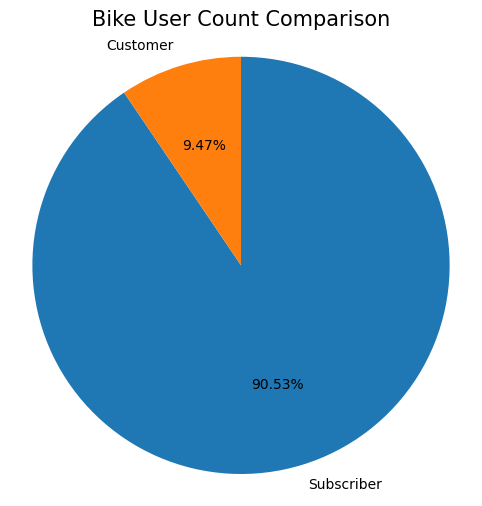

In [23]:
#Show user type by it's percentage

plt.figure(figsize=(10,6))
sorted_counts = cleaned_df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

# 4. Most popular end stations

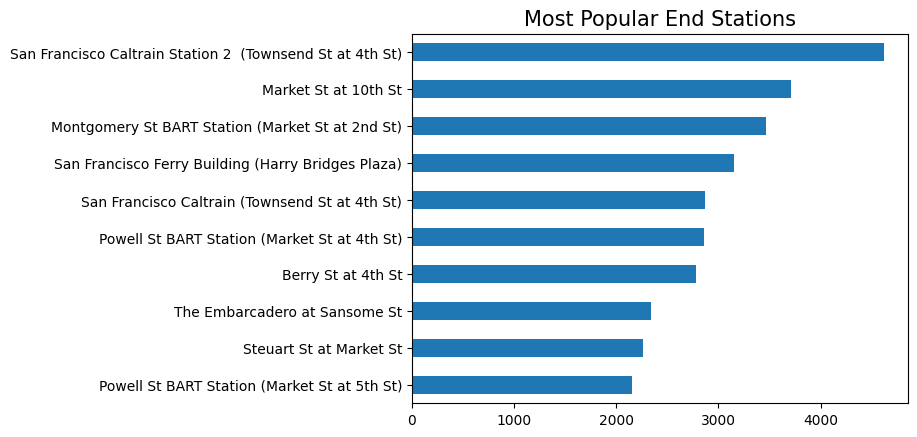

In [24]:
plt.title('Most Popular End Stations', fontsize=15)
cleaned_df.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

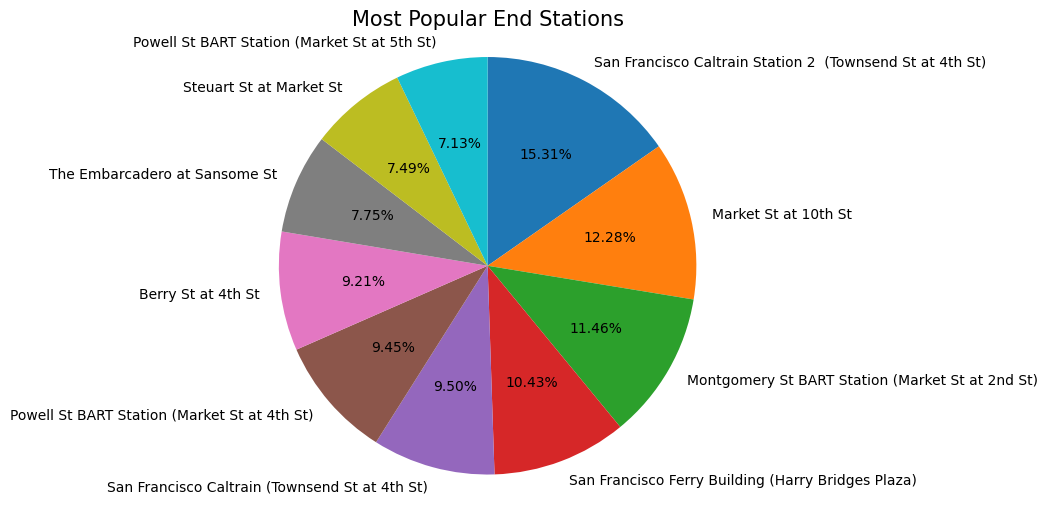

In [40]:
#Show user type by it's percentage

plt.figure(figsize=(10,6))
sorted_counts = cleaned_df['end_station_name'].value_counts().head(10)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Most Popular End Stations', fontsize=15);

# 3. Most popular start stations

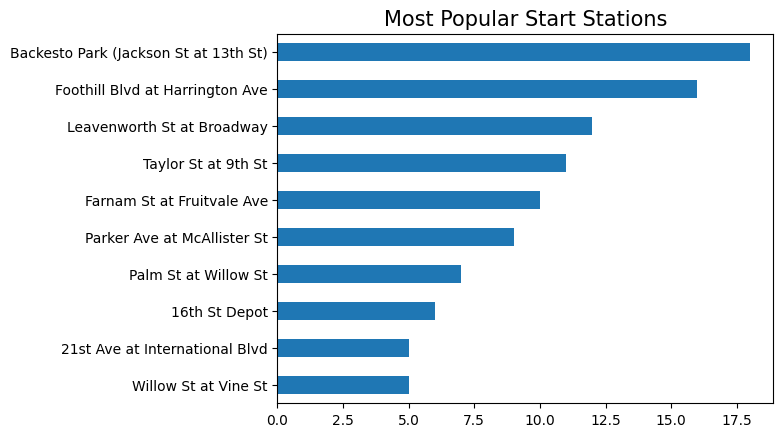

In [25]:
plt.title('Most Popular Start Stations', fontsize=15)
cleaned_df.end_station_name.value_counts(ascending=True).head(10).plot.barh();

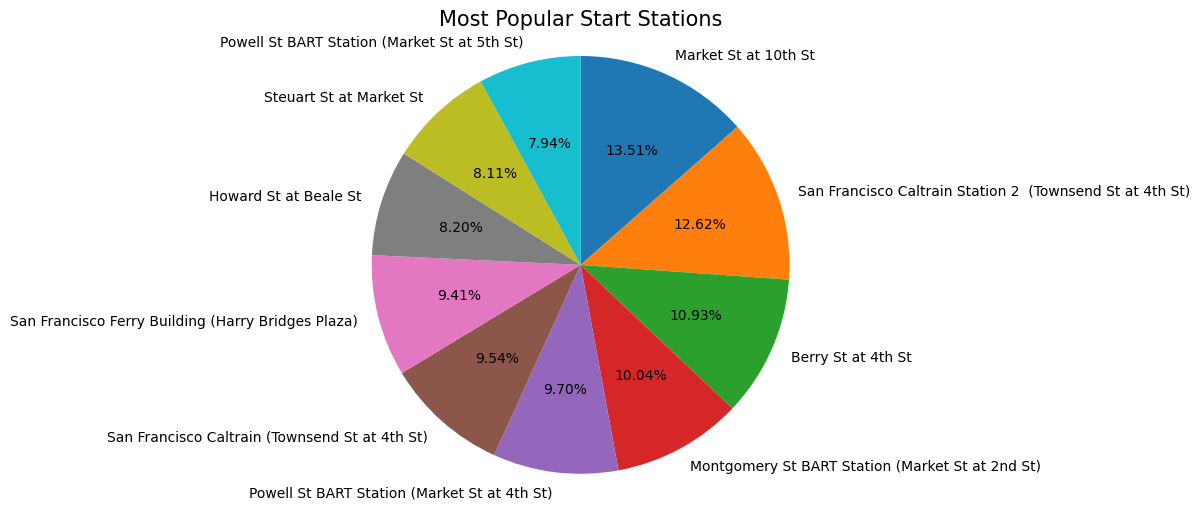

In [41]:
#Show user type by it's percentage

plt.figure(figsize=(10,6))
sorted_counts = cleaned_df['start_station_name'].value_counts().head(10)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Most Popular Start Stations', fontsize=15);

# **Bivariate Exploration

# 5. What is the top 5 longest duration of bike trips made by start station.
### Powell St BART Station has the highest duration followed by Page street.

In [26]:
#Variable (df_longest_duration) was created to hold the sorted value of top 5 duration, it was sorted in ascending order in-order to get top 5
df_top5_longest_duration = cleaned_df.sort_values(by=['duration_sec','start_station_name'], ascending=False)
df_top5_longest_duration[['duration_sec','start_station_name']].head(5)

,duration_sec,start_station_name
81604,84548,Powell St BART Station (Market St at 4th St)
122163,83519,Page St at Scott St
107291,83407,11th St at Natoma St
4987,83195,Bancroft Way at College Ave
91253,82512,Myrtle St at Polk St


[Text(0.5, 1.0, 'Top 5 Start Station by Duration')]

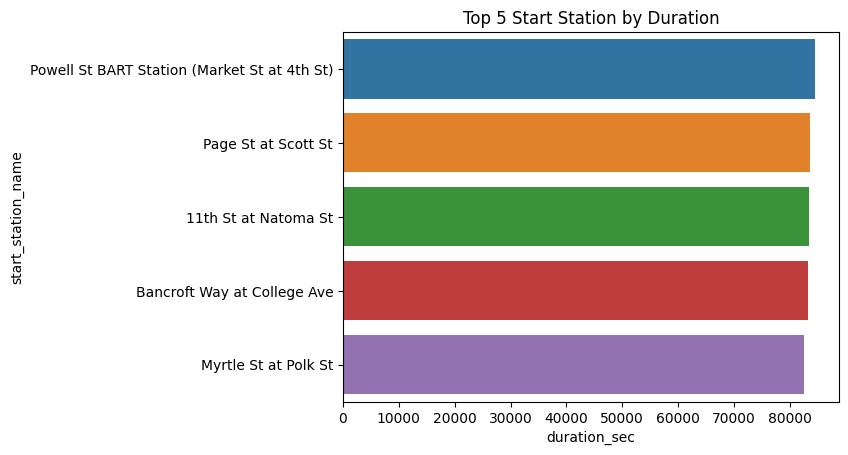

In [27]:
#making a variable to contain the top 5 columns for the columns of interest 
top_dur = df_top5_longest_duration[['duration_sec','start_station_name']].head(5)
sns.barplot(data=top_dur, x= "duration_sec", y="start_station_name").set(title='Top 5 Start Station by Duration')

# 6. What is the top 5 longest duration of bike trips made by end station.
### Myrtle St at Polk Station has the highest duration followed by Page street.

[Text(0.5, 1.0, 'Top 5 End Station by Duration')]

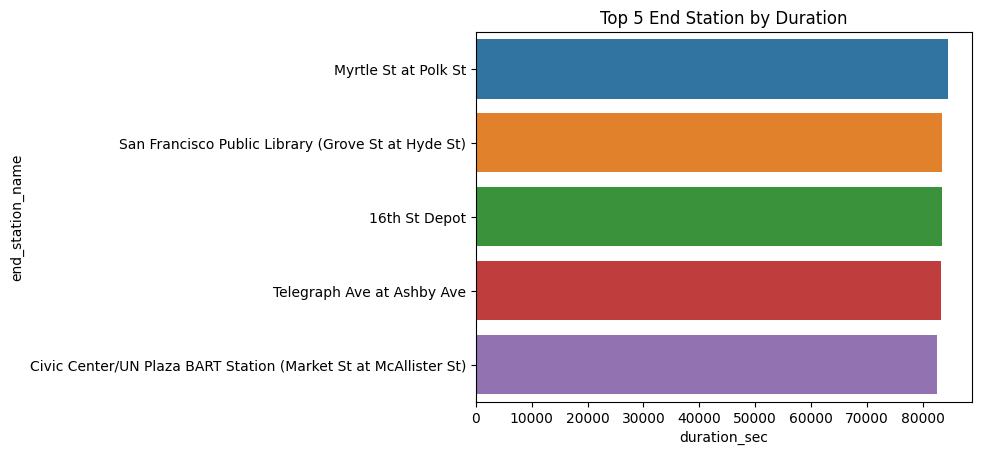

In [38]:
#making a variable to contain the top 5 columns for the columns of interest 
top_dur = df_top5_longest_duration[['duration_sec','end_station_name']].head(5)
sns.barplot(data=top_dur, x= "duration_sec", y="end_station_name").set(title='Top 5 End Station by Duration')

# 7. Check the distribution of user type  by gender.

[Text(0.5, 1.0, 'Distribution of Gender')]

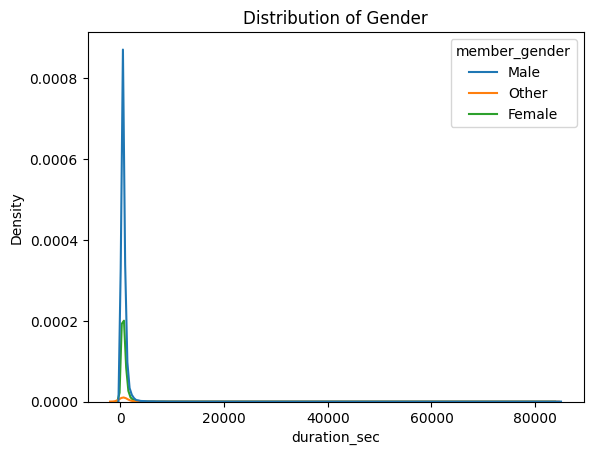

In [28]:
sns.kdeplot(data=cleaned_df, x="duration_sec", hue="member_gender").set(title='Distribution of Gender')

### Multivariate Exploration
> Comparing members birth year and gender by user type

In [29]:
# Make new columns for analysis (month, start_day, end_day, and hour)
cleaned_df['month'] = cleaned_df['start_time_conv'].dt.month_name()
cleaned_df['start_day'] = cleaned_df['end_time_conv'].dt.day_name()
cleaned_df['hour'] = cleaned_df['end_time_conv'].dt.hour
cleaned_df.head(5)

/tmp/ipykernel_3718/2245148351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['month'] = cleaned_df['start_time_conv'].dt.month_name()
/tmp/ipykernel_3718/2245148351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['start_day'] = cleaned_df['end_time_conv'].dt.day_name()
/tmp/ipykernel_3718/2245148351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,start_time_conv,end_time_conv,duration_sec,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,start_day,hour
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,February,Friday,8
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,February,Friday,5
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,February,Friday,4
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,February,Friday,0
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,1793,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,February,Friday,0


In [30]:
#checking columns in "top_dur" variable
top_dur.columns

Index(['duration_sec', 'start_station_name'], dtype='object')

# 8. Comparing start station name and duration by gender type.

[Text(0.5, 1.0, 'Station name by gender')]

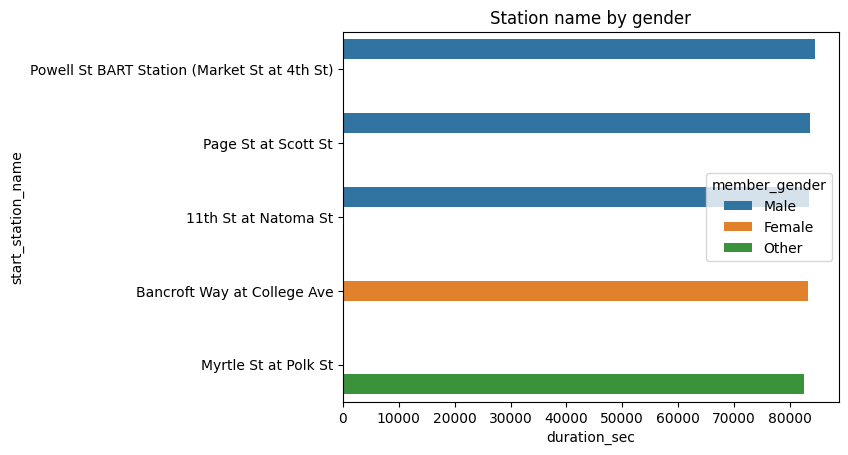

In [31]:
#making a variable to contain the top 5 columns for the columns of interest
top_dur = df_top5_longest_duration[['duration_sec','start_station_name','member_gender']].head(5)
sns.barplot(data=top_dur, x= "duration_sec", y="start_station_name", hue="member_gender").set(title='Station name by gender')

# 9. Comparing end station name and duration by gender type.

[Text(0.5, 1.0, 'Duration by End Station')]

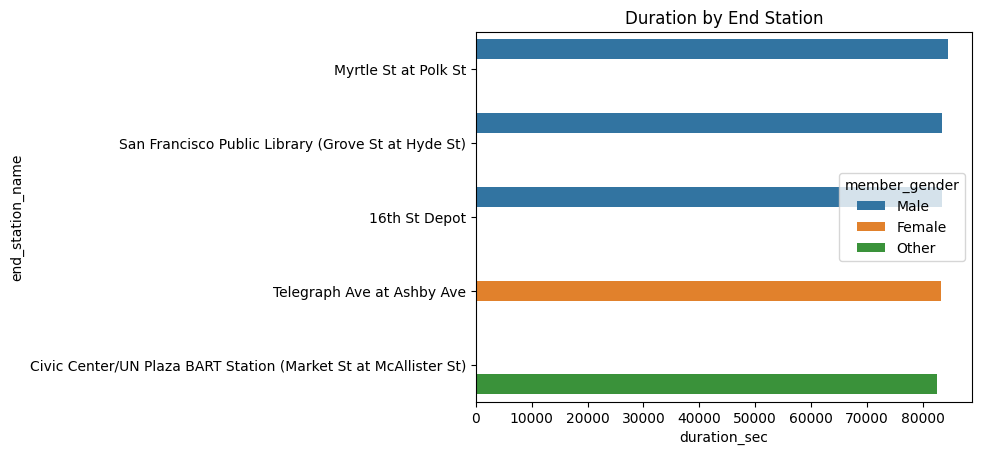

In [32]:
#making a variable to contain the top 5 columns for the columns of interest
top_dur = df_top5_longest_duration[['duration_sec','end_station_name','member_gender']].head(5)
sns.barplot(data=top_dur, x= "duration_sec", y="end_station_name", hue="member_gender").set(title='Duration by End Station')

# 10. Checking how long each gender commuted on the start day

In [33]:
cleaned_df["start_day"].sample(5)

169164       Friday
62606     Wednesday
150870      Tuesday
97842      Thursday
104127      Tuesday
Name: start_day, dtype: object

[Text(0.5, 1.0, 'Weekday by Gender')]

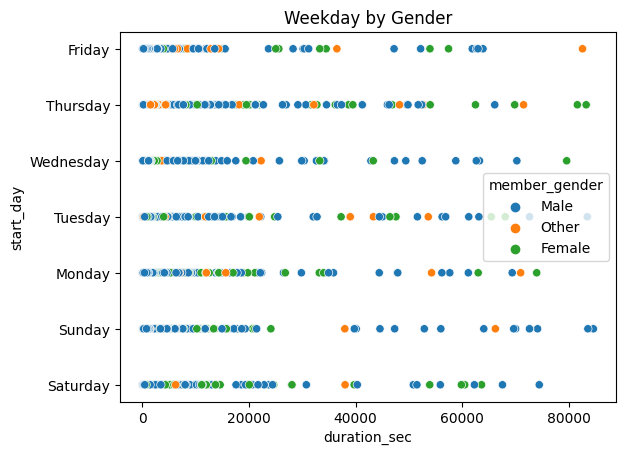

In [34]:
sns.scatterplot(data=cleaned_df, x="duration_sec", y="start_day", hue="member_gender").set(title='Weekday by Gender')

# Conclusions

# At the end of the analysis some of the following insights were noted.
### >> The percentage of Male is greater than that of the female population being analysed.
### >> The subscribers are more than the customers
### >> More male commuters used the Powell St BART Station (Market St at 4th St) as start station more than the other genders.
### >> More female commuters used the Myrtle St at Polk St as end station more than the other genders.
### >> The last chart shows the distribution of male superceeding that of female and also the only outliers is when the females exceeded the 6k seconds mark on thursday and wednesday.

In [35]:
cleaned_df.to_csv('Ford_Bike_Final.csv')